<a href="https://colab.research.google.com/github/wonakayame123/promenejemen/blob/main/promenejemen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib pandas

[12:50:41] Suhu: 39.17°C, Kelembapan: 36.36%
⚠️ Suhu terlalu tinggi: 39.17°C
⚠️ Kelembapan terlalu rendah: 36.36%
--------------------------------------------------
[12:50:42] Suhu: 34.23°C, Kelembapan: 43.28%
--------------------------------------------------
[12:50:43] Suhu: 36.51°C, Kelembapan: 88.98%
⚠️ Suhu terlalu tinggi: 36.51°C
⚠️ Kelembapan terlalu tinggi: 88.98%
--------------------------------------------------
[12:50:44] Suhu: 35.67°C, Kelembapan: 75.49%
⚠️ Suhu terlalu tinggi: 35.67°C
--------------------------------------------------
[12:50:45] Suhu: 36.48°C, Kelembapan: 44.24%
⚠️ Suhu terlalu tinggi: 36.48°C
--------------------------------------------------
[12:50:46] Suhu: 38.55°C, Kelembapan: 71.76%
⚠️ Suhu terlalu tinggi: 38.55°C
--------------------------------------------------
[12:50:47] Suhu: 36.73°C, Kelembapan: 48.55%
⚠️ Suhu terlalu tinggi: 36.73°C
--------------------------------------------------
[12:50:48] Suhu: 33.88°C, Kelembapan: 77.09%
-----------------

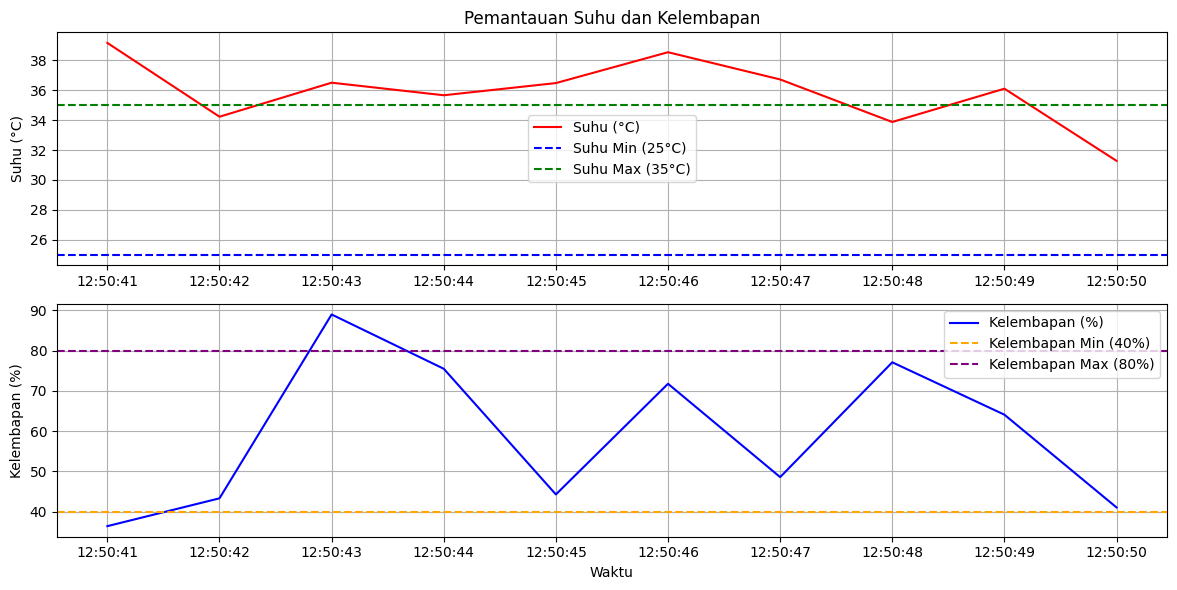

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Simulasi data suhu dan kelembapan
def generate_data():
    suhu = np.random.uniform(20, 40)  # Simulasi suhu (20°C - 40°C)
    kelembapan = np.random.uniform(30, 90)  # Simulasi kelembapan (30% - 90%)
    return suhu, kelembapan

# Fungsi untuk memantau dan memberikan notifikasi
def monitor_data(suhu, kelembapan, suhu_min=25, suhu_max=35, kelembapan_min=40, kelembapan_max=80):
    notifications = []
    if suhu < suhu_min:
        notifications.append(f"⚠️ Suhu terlalu rendah: {suhu:.2f}°C")
    elif suhu > suhu_max:
        notifications.append(f"⚠️ Suhu terlalu tinggi: {suhu:.2f}°C")

    if kelembapan < kelembapan_min:
        notifications.append(f"⚠️ Kelembapan terlalu rendah: {kelembapan:.2f}%")
    elif kelembapan > kelembapan_max:
        notifications.append(f"⚠️ Kelembapan terlalu tinggi: {kelembapan:.2f}%")

    return notifications

# Simulasi monitoring selama 10 iterasi
data = []
for i in range(10):
    suhu, kelembapan = generate_data()
    notifications = monitor_data(suhu, kelembapan)
    data.append({"Waktu": time.strftime("%H:%M:%S"), "Suhu (°C)": suhu, "Kelembapan (%)": kelembapan})

    print(f"[{time.strftime('%H:%M:%S')}] Suhu: {suhu:.2f}°C, Kelembapan: {kelembapan:.2f}%")
    for note in notifications:
        print(note)
    print("-" * 50)
    time.sleep(1)  # Tunggu 1 detik (simulasi real-time)

# Konversi ke DataFrame
df = pd.DataFrame(data)

# Visualisasi data
plt.figure(figsize=(12, 6))

# Grafik Suhu
plt.subplot(2, 1, 1)
plt.plot(df["Waktu"], df["Suhu (°C)"], label="Suhu (°C)", color="red")
plt.axhline(y=25, color="blue", linestyle="--", label="Suhu Min (25°C)")
plt.axhline(y=35, color="green", linestyle="--", label="Suhu Max (35°C)")
plt.ylabel("Suhu (°C)")
plt.title("Pemantauan Suhu dan Kelembapan")
plt.legend()
plt.grid()

# Grafik Kelembapan
plt.subplot(2, 1, 2)
plt.plot(df["Waktu"], df["Kelembapan (%)"], label="Kelembapan (%)", color="blue")
plt.axhline(y=40, color="orange", linestyle="--", label="Kelembapan Min (40%)")
plt.axhline(y=80, color="purple", linestyle="--", label="Kelembapan Max (80%)")
plt.ylabel("Kelembapan (%)")
plt.xlabel("Waktu")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()